*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [1]:
%pip install sweetviz
%pip install feature-engine
%pip install scikit-optimize
%pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 6.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 4.7 MB/s 
     |████████████████████████████████| 9.8 MB 1.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 2.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [3]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-06-25 22:26:54--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2022-06-25 22:26:54 (81.0 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


                                             |          | [  0%]   00:00 -> (? left)


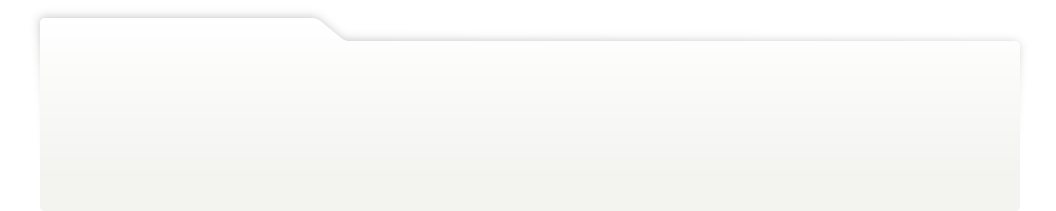
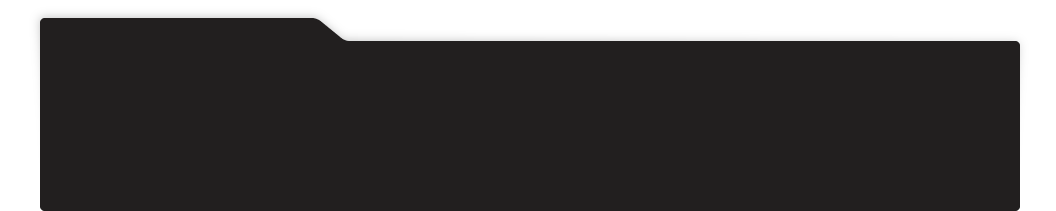
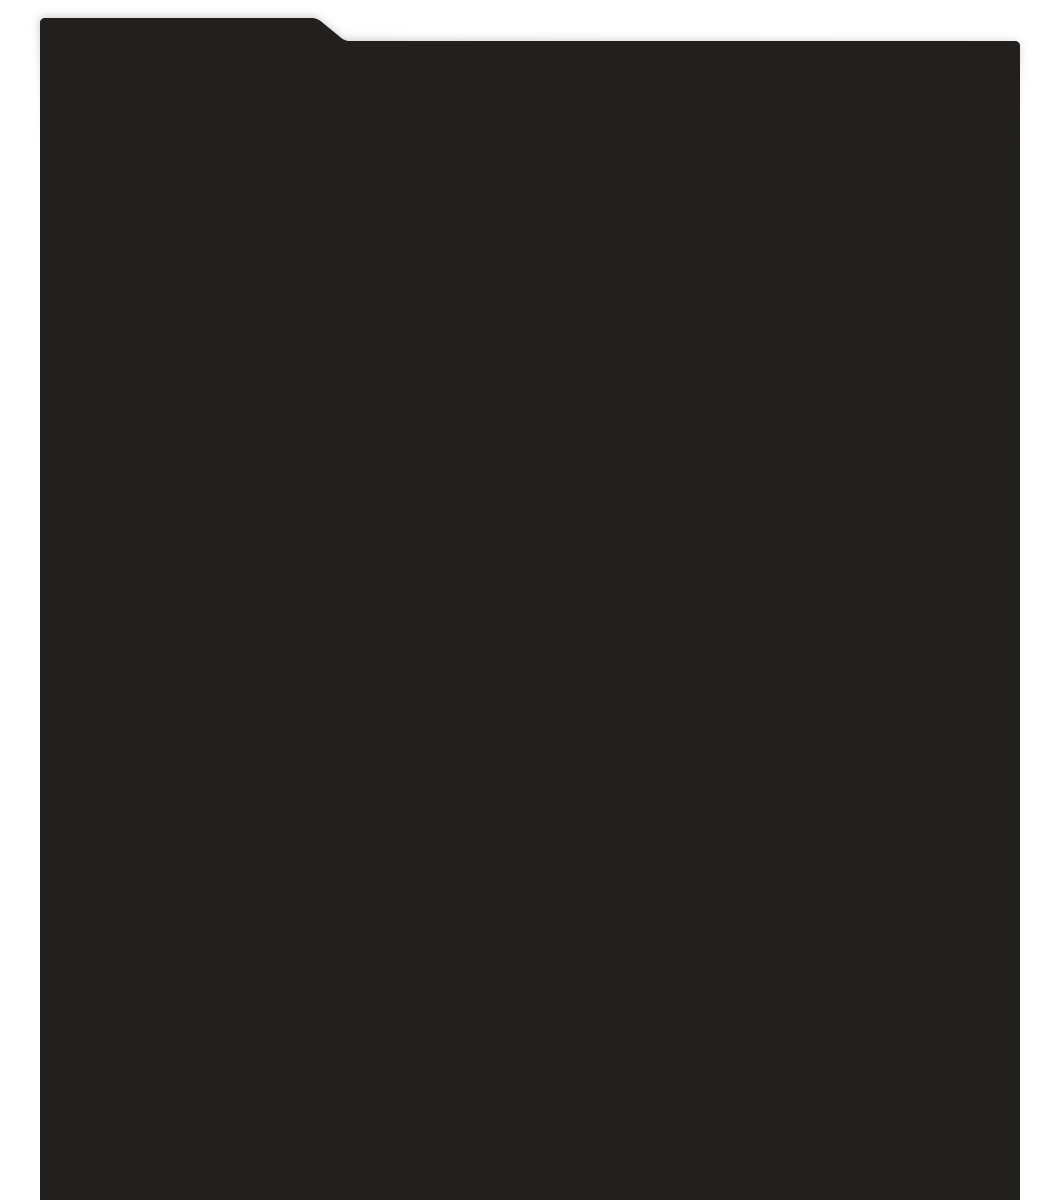
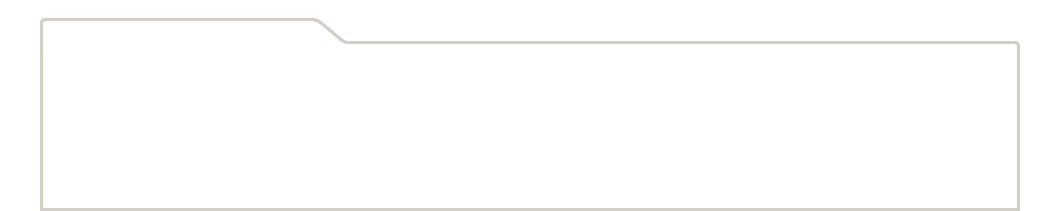
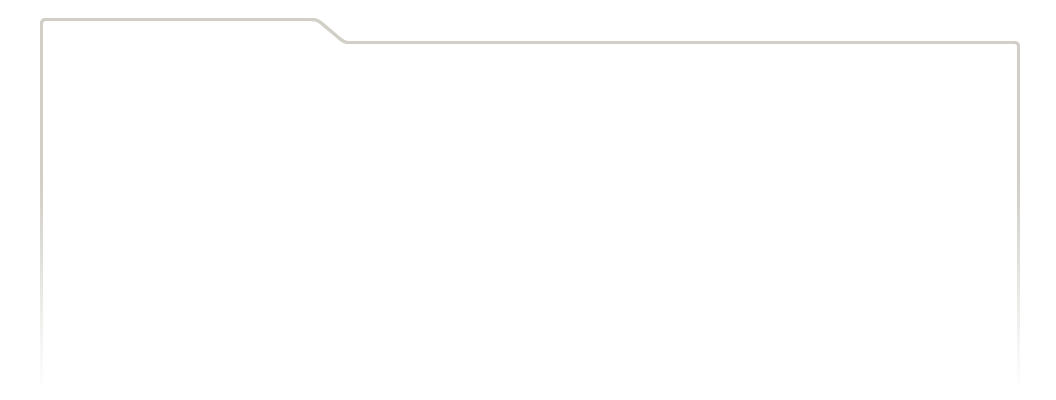
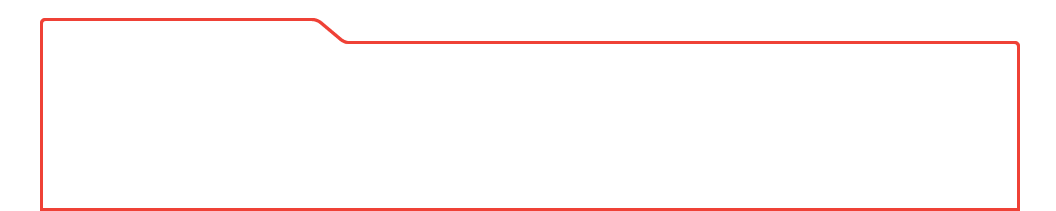
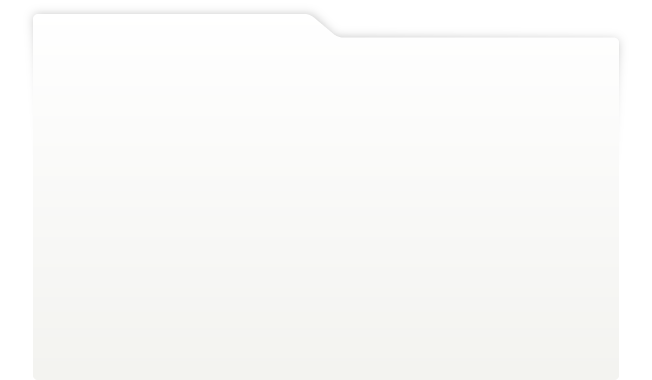
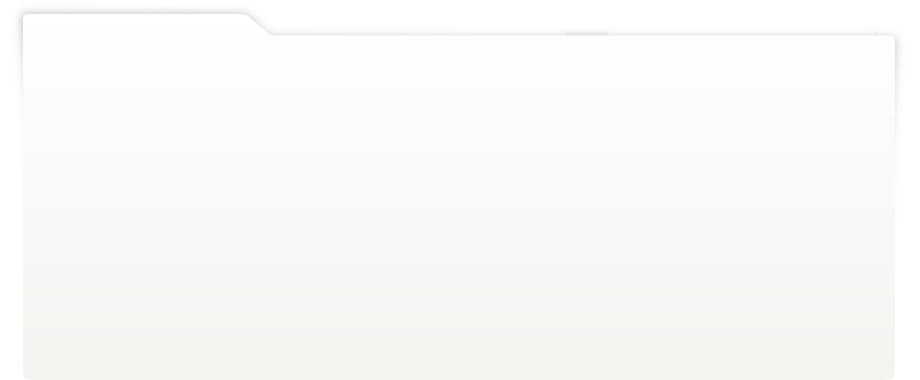
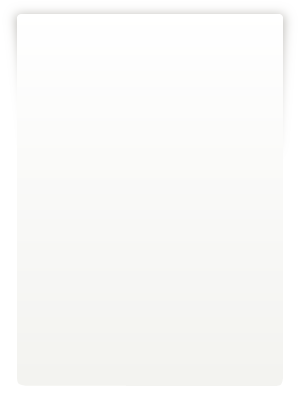
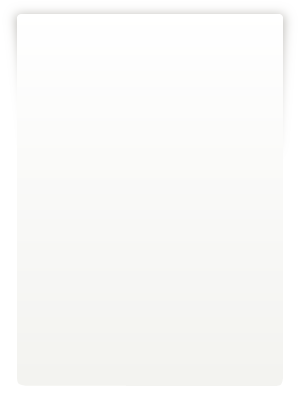
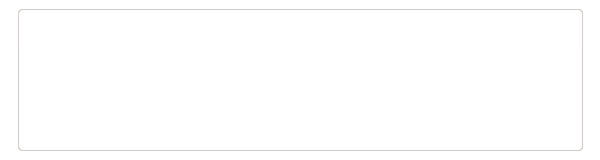
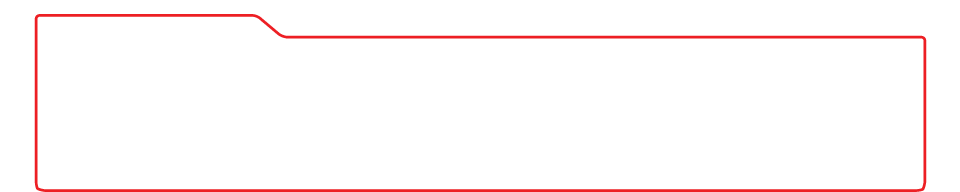
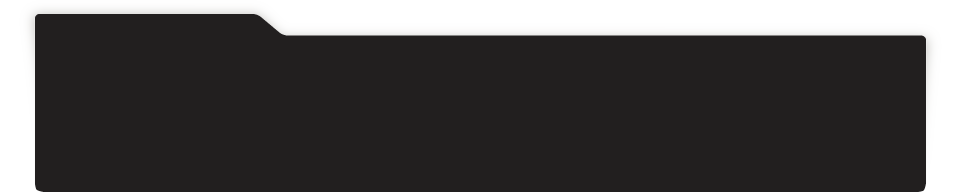
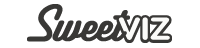
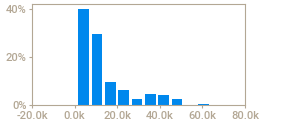
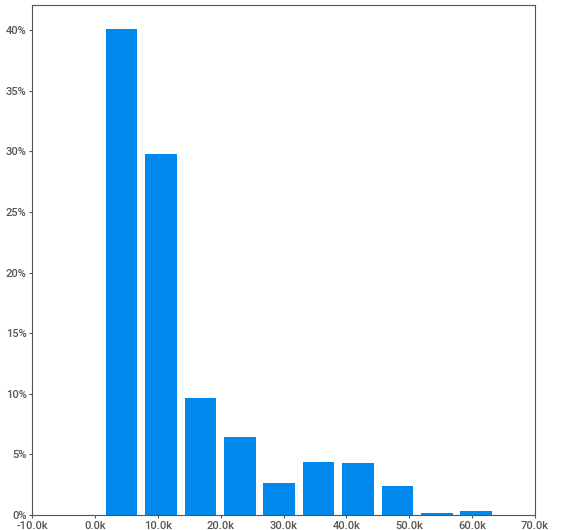
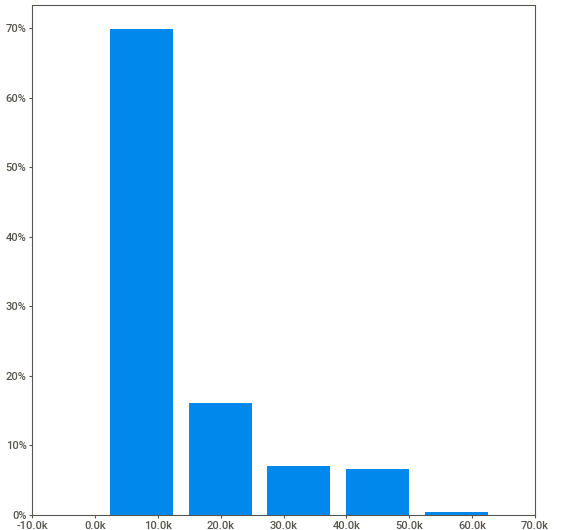
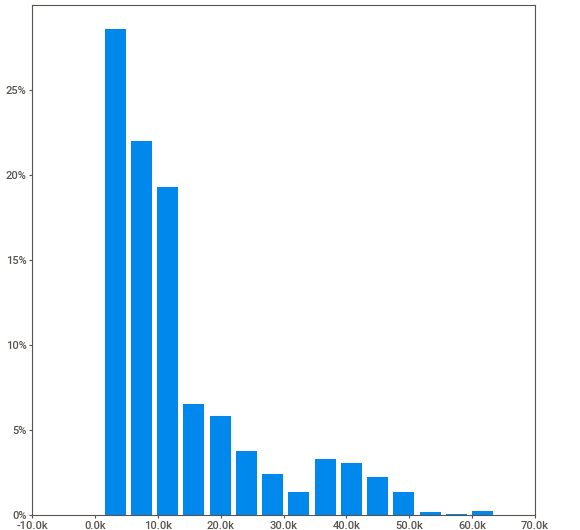
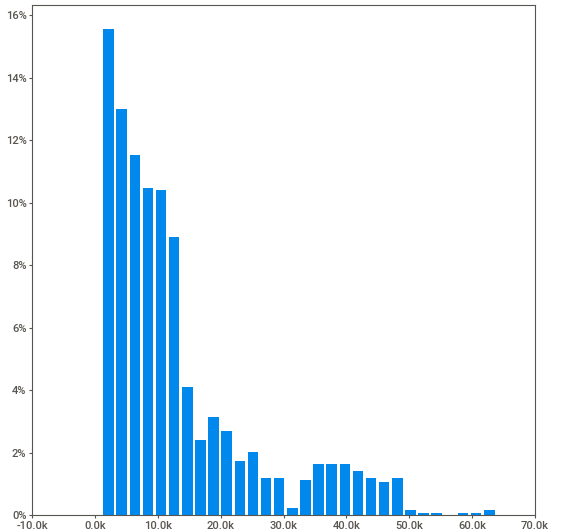
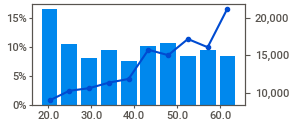
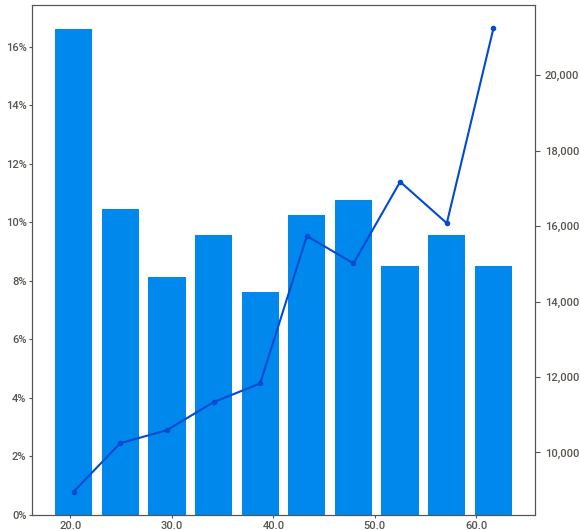
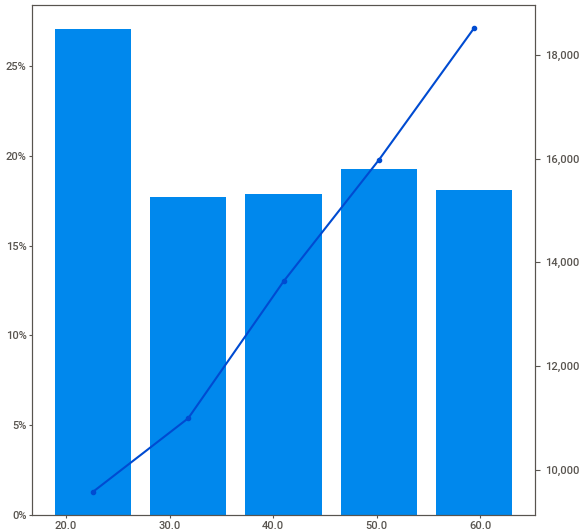
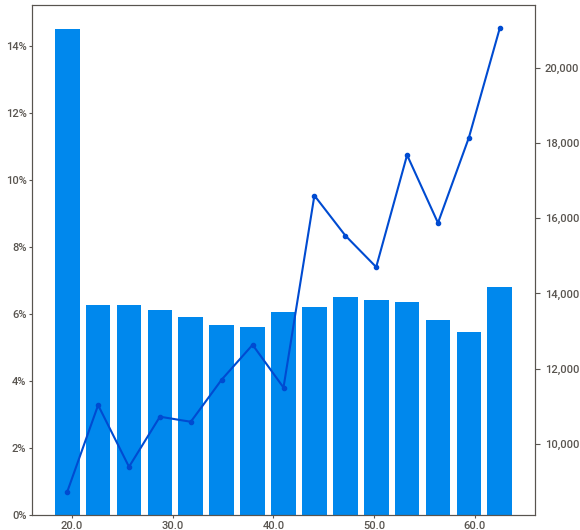
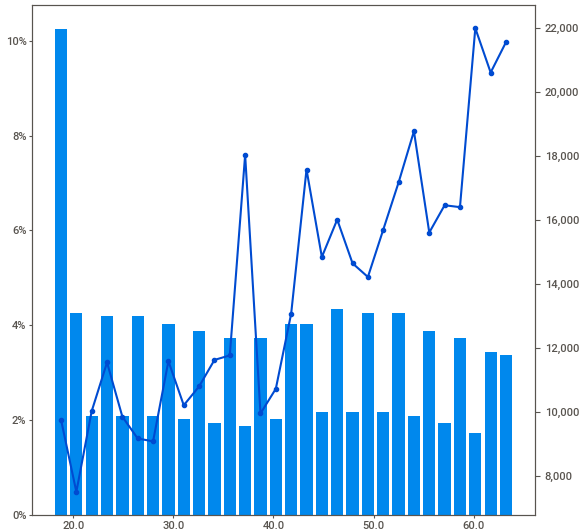
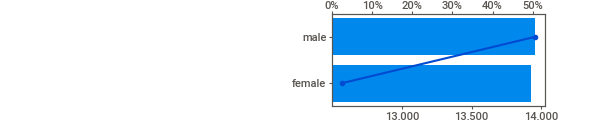
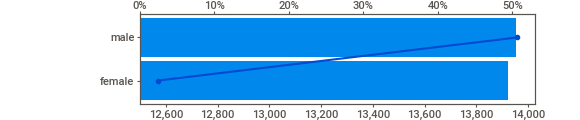
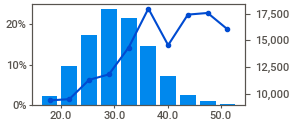
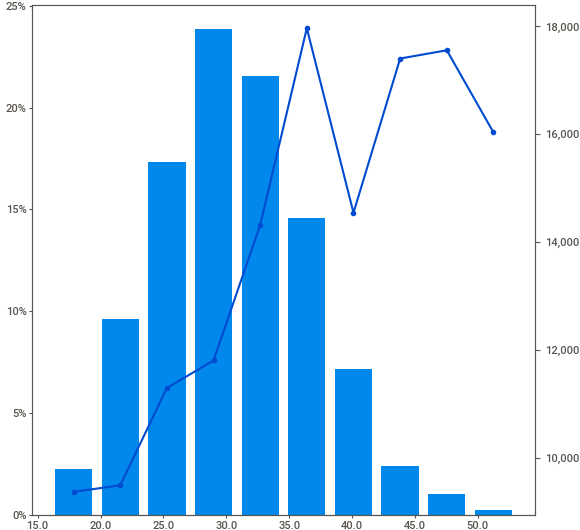
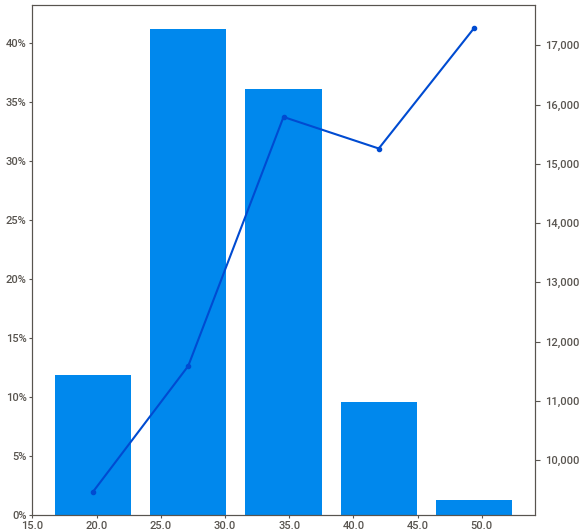
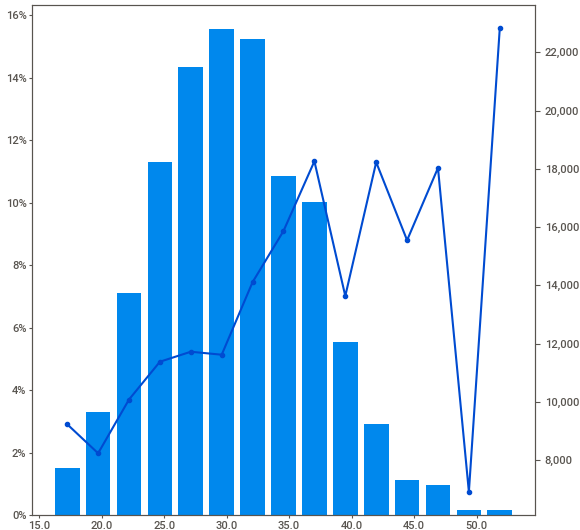
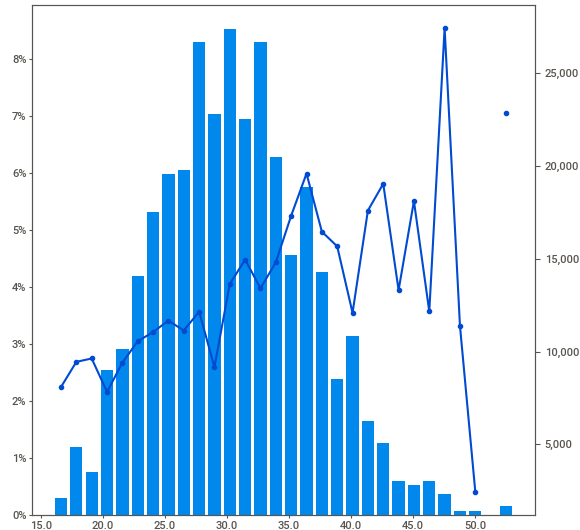
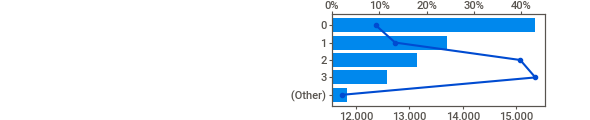
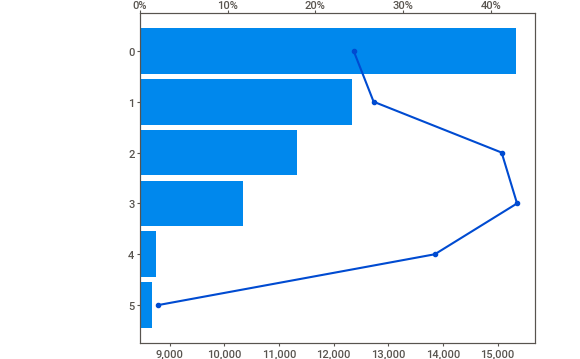
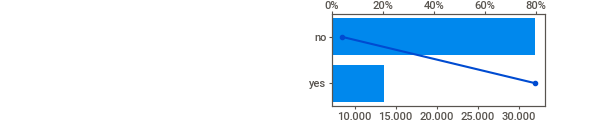
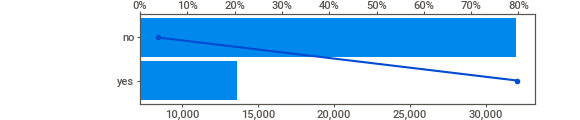
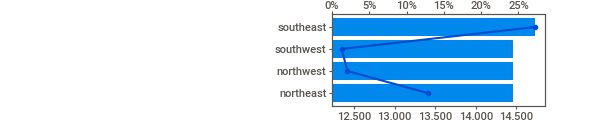
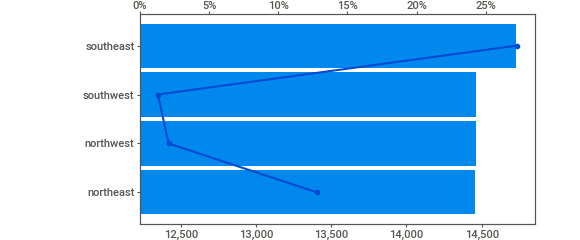
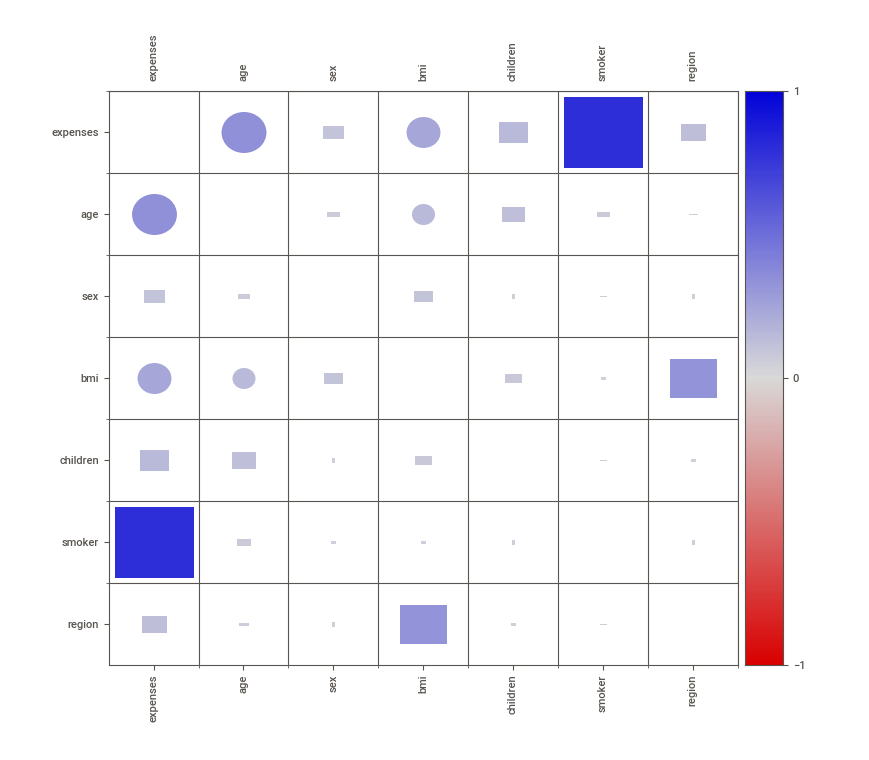
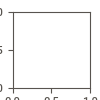

In [4]:
data=dataset
import sweetviz as sv
# reporte=sv.analyze(data)
reporte=sv.analyze(data,target_feat='expenses')
# reporte.show_html('titanic.html')
reporte.show_notebook()

In [5]:
## es muy razonable que haya una correlación entre expensas y edad, básicamente por grupos de edad seguramente va a haber un salto de costos
## el tema de smoke también imagino por el riesgo de costos de futuras patalogías relacionadas
## bmi tiene correlación
## simplifica mucho el análisis que no hay presencias de Missing Values!
target='expenses'
#data=data.drop('alive',axis=1)

cat_vars = [var for var in data.columns if data[var].dtype == 'O' and var not in target]
cat_vars

['sex', 'smoker', 'region']

In [6]:
num_vars = [
    var for var in data.columns if var not in cat_vars and var != target
]

# number of numerical variables
num_vars


['age', 'bmi', 'children']

In [7]:

#  let's male a list of discrete variables seguramente seran categoricas ordinales o nominales
discrete_vars = [var for var in num_vars if len(
    # data[var].unique()) < 20 and var not in year_vars]
    data[var].unique()) < 20 ]
discrete_vars

['children']

In [8]:
num_vars = [
    var for var in data.columns if var not in cat_vars and var != target  and var not in discrete_vars
]
num_vars

['age', 'bmi']

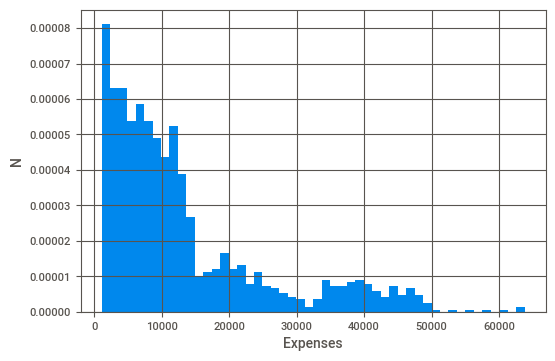

In [9]:
###target regre veamos la variable
# histogran to evaluate target distribution
### skewed not normal
data[target].hist(bins=50, density=True)
plt.ylabel('N')
plt.xlabel('Expenses')
plt.show()

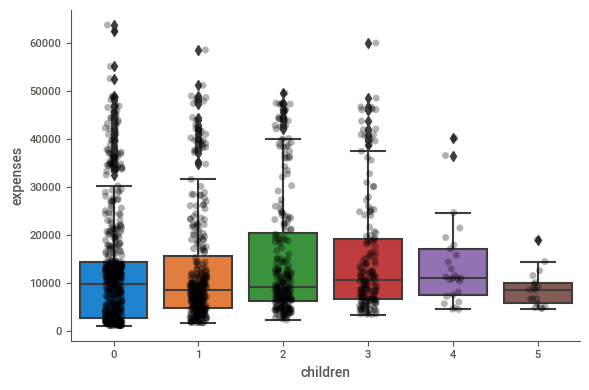

In [10]:
###si hay una relacion monotónica con el target pueden codificarse como ordinales las discretas
import seaborn as sns
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='expenses', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot con aplha
    sns.stripplot(x=var, y='expenses', data=data, jitter=0.1, alpha=0.3, color='k')
    # print(pd.crosstab(data[var], data['survived'], margins=True, normalize='index'))
    plt.show()

In [11]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars)) 

Number of continuous variables:  2


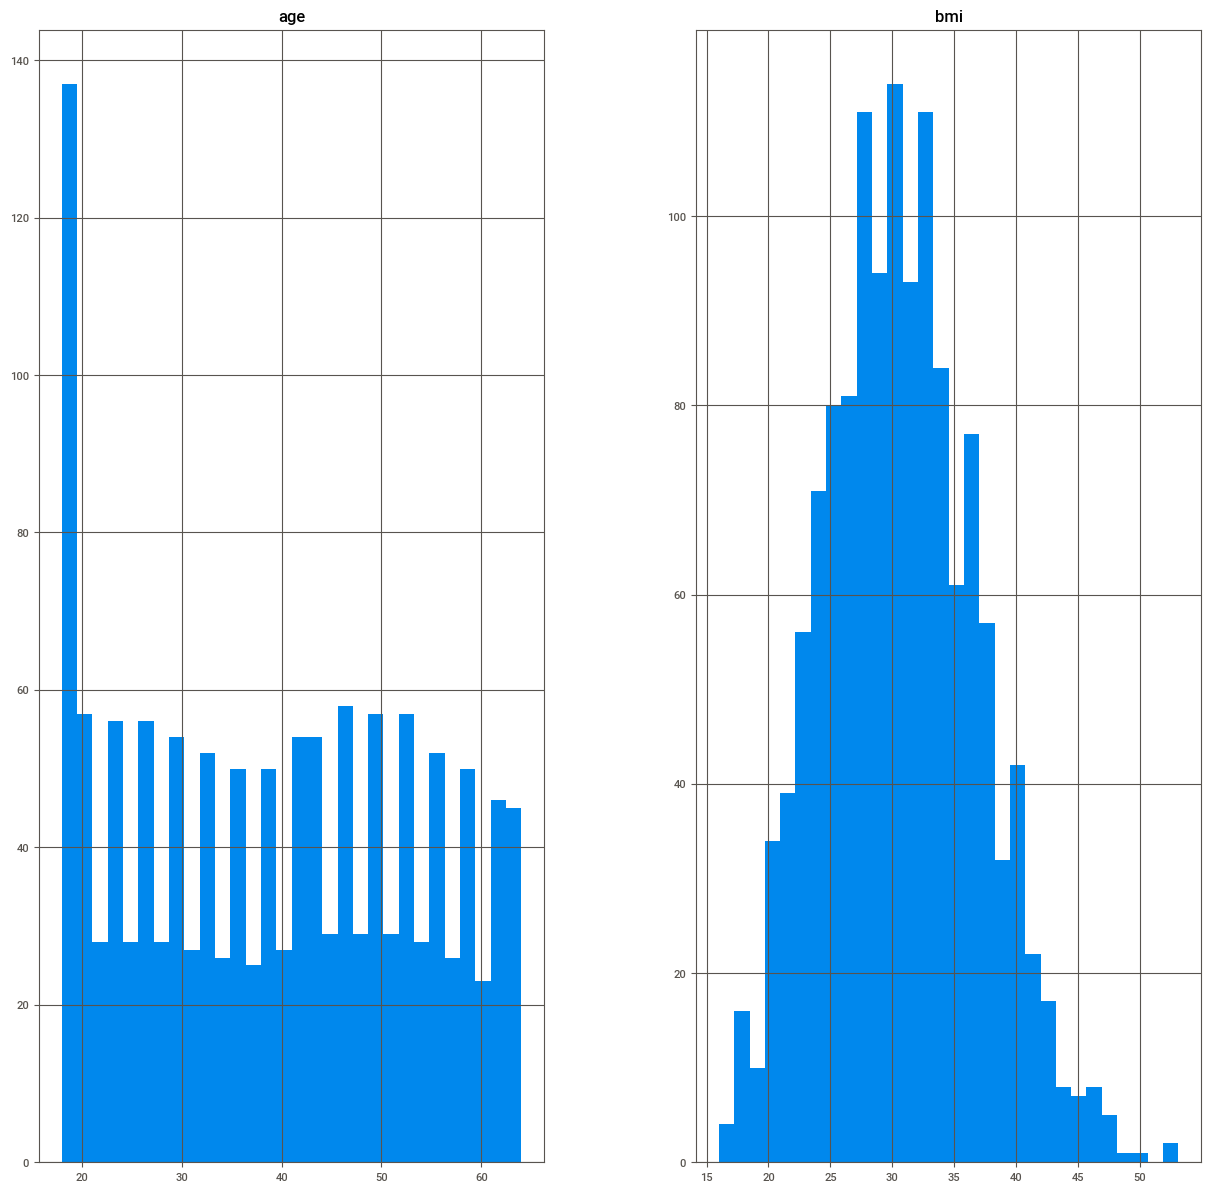

In [12]:
data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [13]:
# first make a list with the super skewed variables
# for later
### muy skewed binarizarlas
skewed = [

]

# capture the remaining continuous variables

cont_vars = [
    'age',
    'bmi'

]

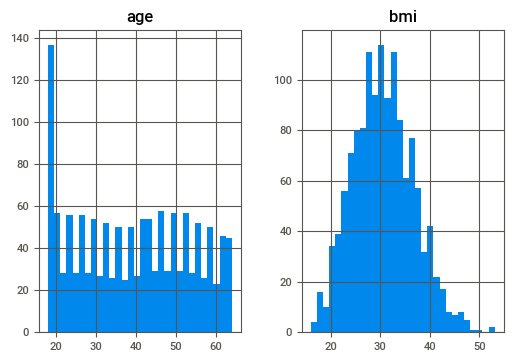

In [14]:
from scipy import stats
tmp = data.copy()

for var in cont_vars:

    # transform the variable with logarithm
    stats.yeojohnson(data[var])
    #tmp[var] = np.log(data[var]+1)
    
tmp[cont_vars].hist(bins=30)
plt.show()

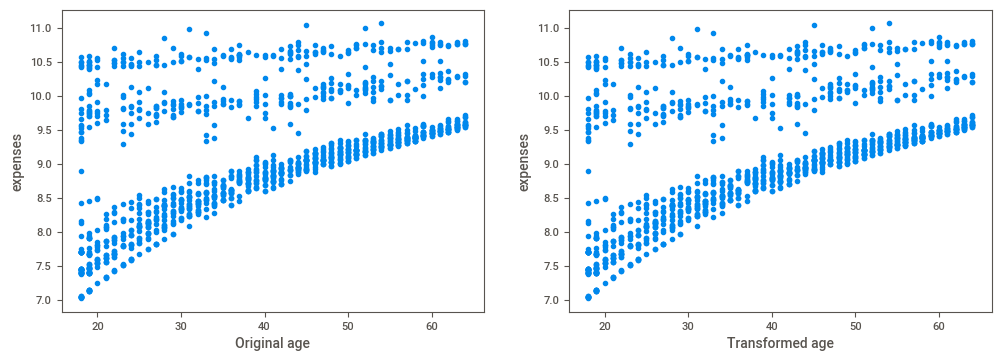

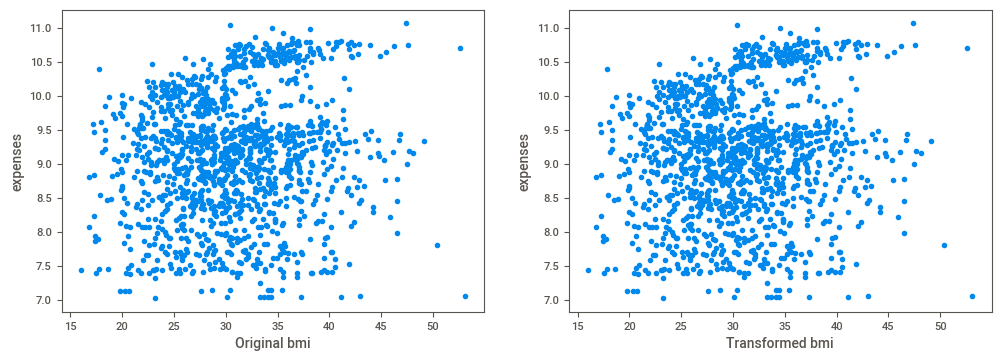

In [15]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

# for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
for var in cont_vars:    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['expenses']))
    plt.ylabel('expenses')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['expenses']))
    plt.ylabel('expenses')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

### la transformación no ayuda mucho

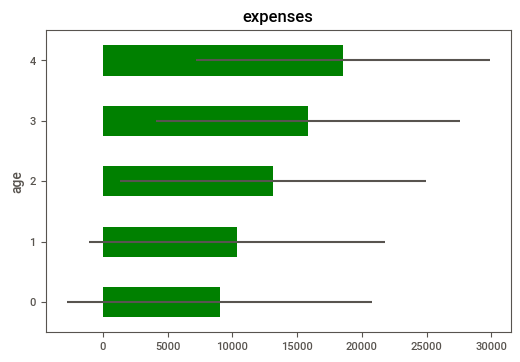

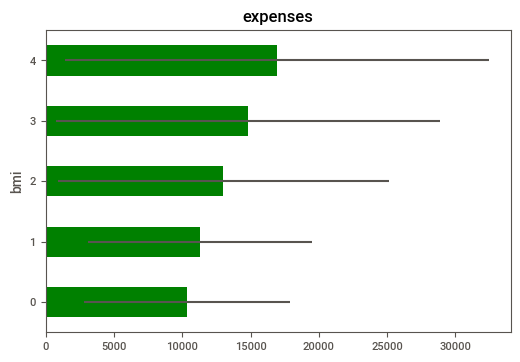

In [16]:
# las que son skewed extr veamos de binarizarlas
## si hay continuas candidatas a discretizarlas aca se ve que cada grupo que se separo
## hay una relacion monotonica con la edad
from feature_engine.discretisation import EqualFrequencyDiscretiser


skewed2=['age','bmi']
for var in skewed2:
    
    disc = EqualFrequencyDiscretiser(q=5, variables = [var])
    tmp = data.copy()
    disc.fit(tmp)
    # map the variable values into 0 and 1
    
    # tmp[var] = np.where(data[var]==0, 0, 1)
    tmp2=disc.transform(tmp)
    # determine mean sale price in the mapped values
    tmp2 = tmp2.groupby(var)['expenses'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp2.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="expenses", color='green')

    plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# para la ingeniería de variables
from sklearn.preprocessing import StandardScaler
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

X_train, X_test, y_train, y_test = train_test_split(data.drop(['expenses'], axis=1),

                                                    data['expenses'],
                                                    test_size=0.2,
                                                    random_state=123)

X_train.shape, X_test.shape




((1070, 6), (268, 6))

In [18]:

# num_varsf = [var for var in X_train.columns if var in cont_vars or var in skewed or var in year_vars]
num_varsf = [var for var in X_train.columns if var in cont_vars or var in skewed ]
num_varsf

vars_with_na_num = [var for var in num_varsf if X_train[var].isnull().sum() > 0]
vars_with_na_num

[]

In [19]:
##transformaremos age y bmi a categorica
# from feature_engine.discretisation import EqualFrequencyDiscretiser
disc = EqualFrequencyDiscretiser(q=5, variables = ['age','bmi'])

disc.fit(X_train)

# transformar sets de entrenamiento y prueba

X_train = disc.transform(X_train)
X_test= disc.transform(X_test)


In [20]:

cat_varsf = [var for var in X_train.columns if X_train[var].dtype == 'O']
cat_varsf

cat_vars_with_na = [
    var for var in cat_varsf
    if X_train[var].isnull().sum() > 0
]

cat_vars_with_na

[]

In [21]:

with_string_missing = [
    var for var in cat_vars_with_na if X_train[var].isnull().mean() > 0.1]

# variables to impute with the most frequent category
with_frequent_category = [
    var for var in cat_vars_with_na if X_train[var].isnull().mean() < 0.1]

with_string_missing


with_frequent_category

[]

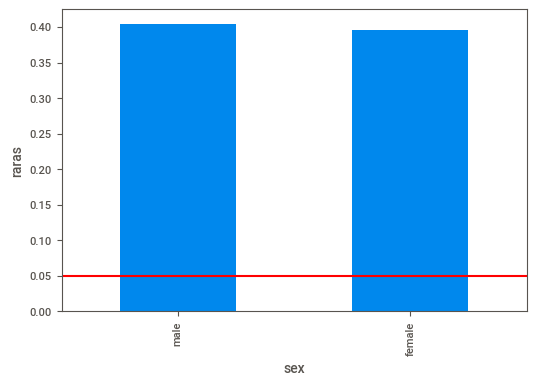

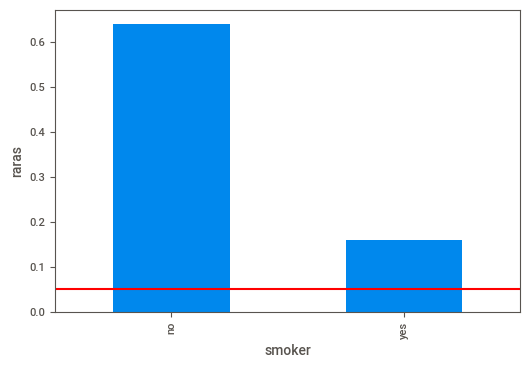

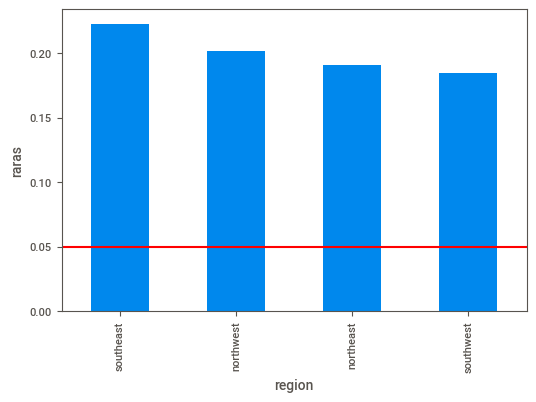

In [22]:
cat_varsf
import matplotlib.pyplot as plt
N = len(data)

# Por cada categoria
for col in cat_varsf:

    # contar el número de casas por cada categoría
    # y dividir por el número total de casas

    # esto es, el porcentaje de casas por cada categoría 

    temp_df = pd.Series(X_train[col].value_counts() / N)

    # Creemos una gráfica con los porcentajes anteriores 
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # Una línea al 5 % marca el límite para las categorias poco comunes
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('raras')
    plt.show()

## no hay categorias raras 

In [23]:

from feature_engine.encoding import OneHotEncoder
ohe_enc = OneHotEncoder(
    top_categories=5,  # puedes cambiar este valor para seleccionar mas o menos variables
    # puedes seleccionar cuales variables codificar
    variables=cat_varsf,
    drop_last=False)

ohe_enc.fit(X_train)

X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

                                             |          | [  0%]   00:00 -> (? left)


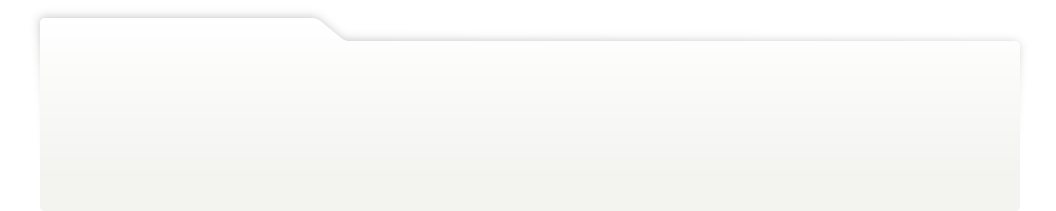
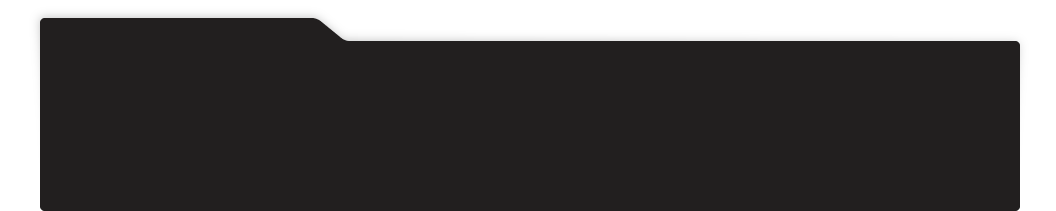
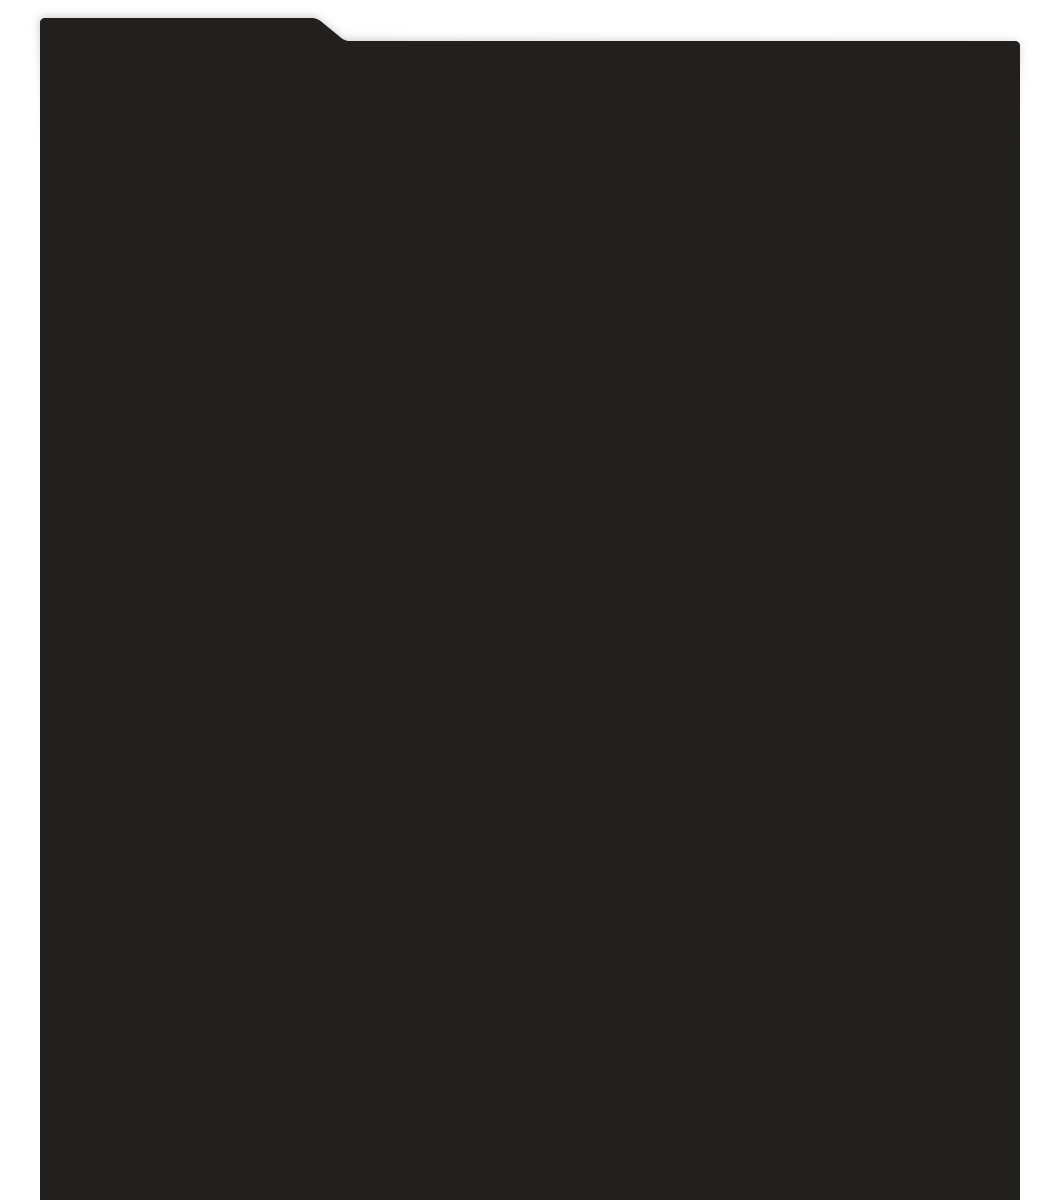
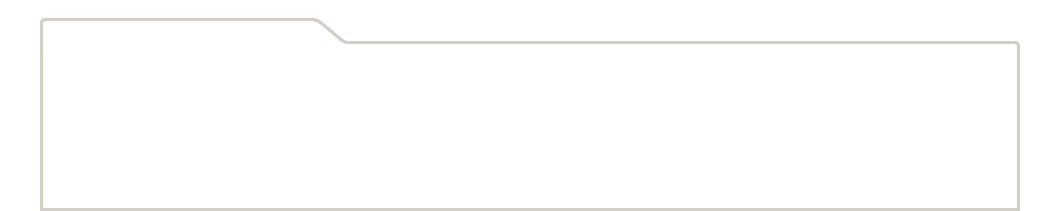
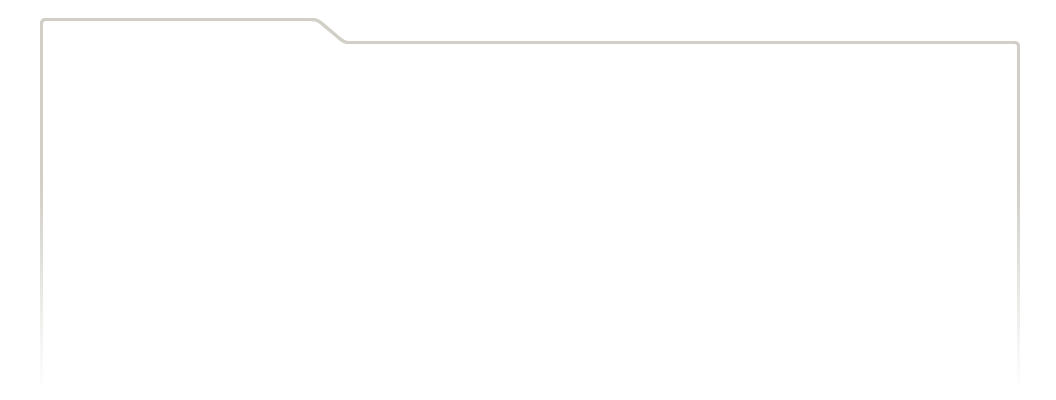
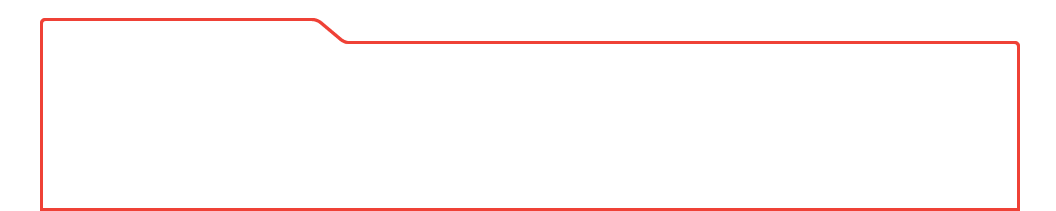
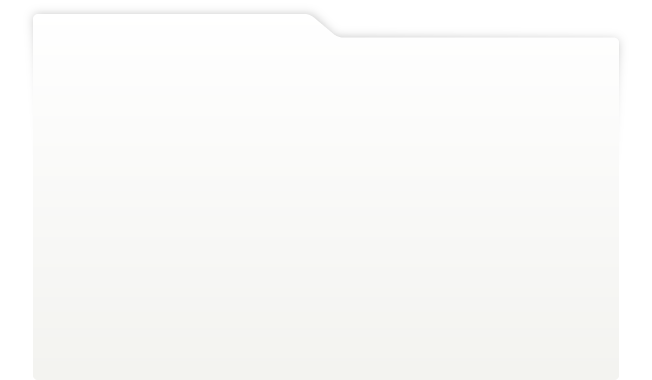
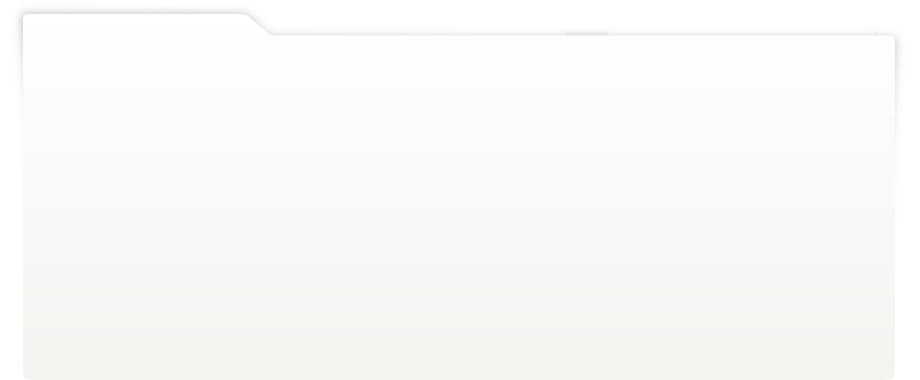
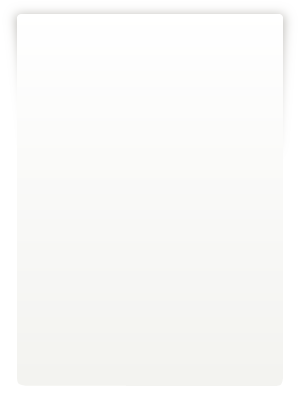
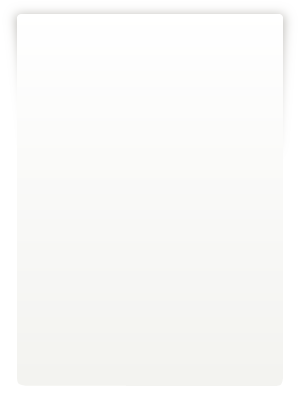
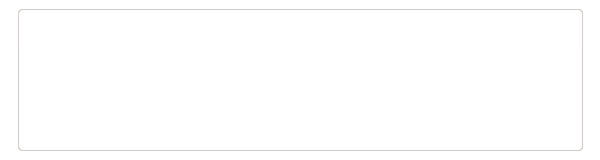
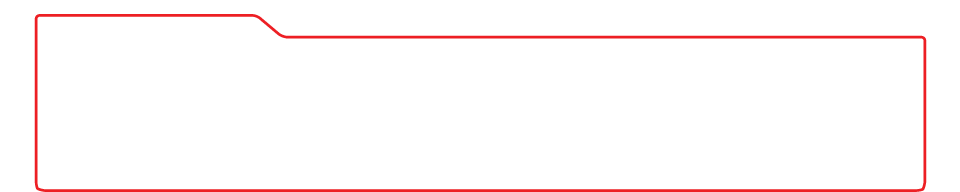
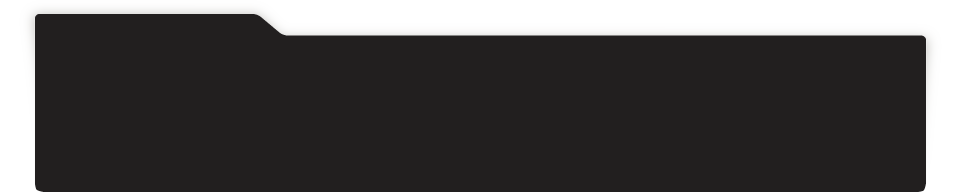
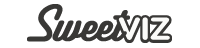
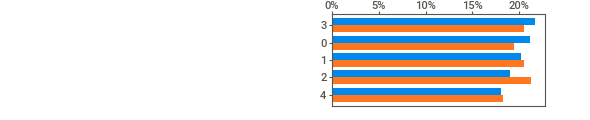
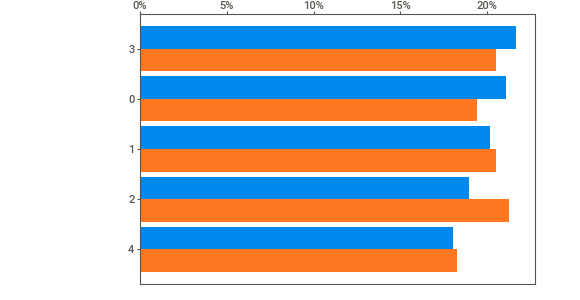
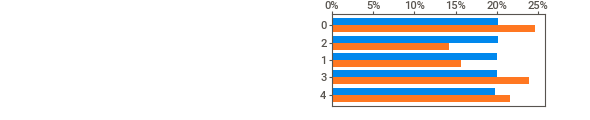
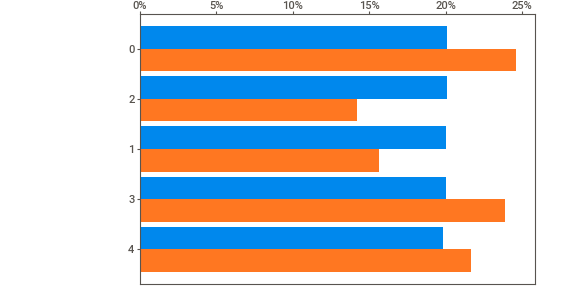
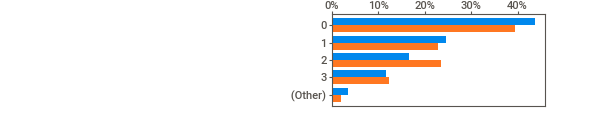
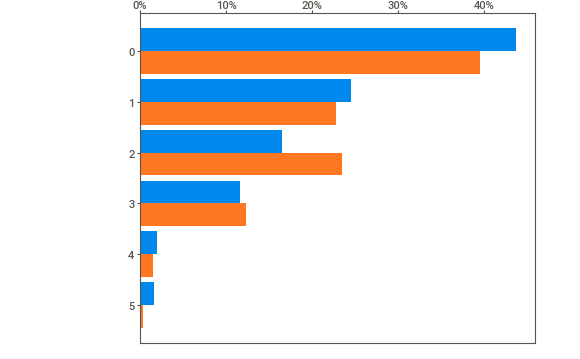
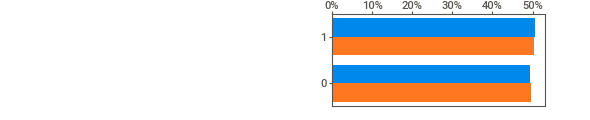
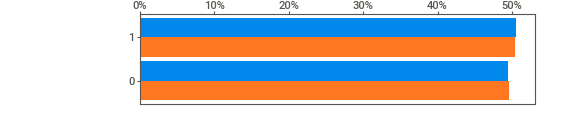
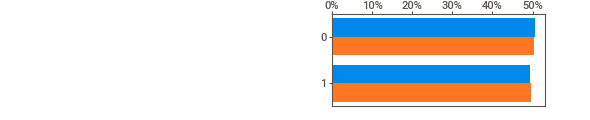
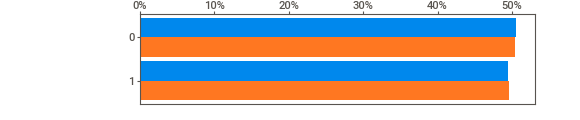
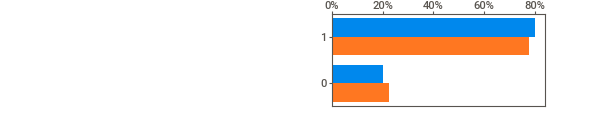
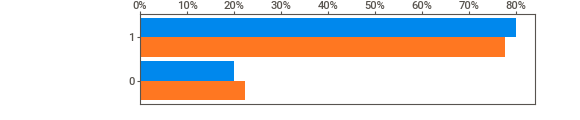
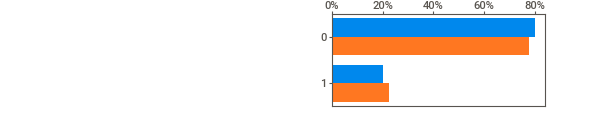
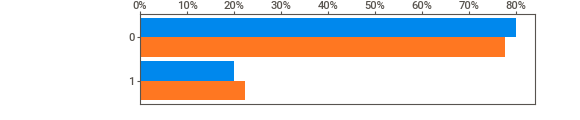
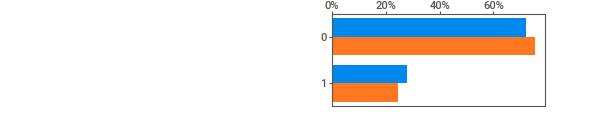
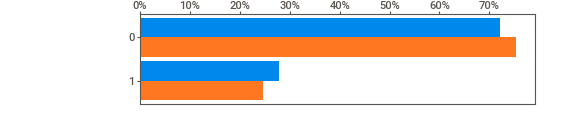
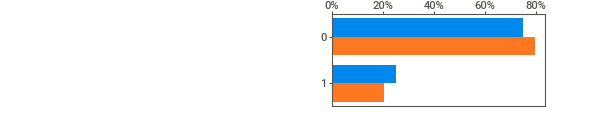
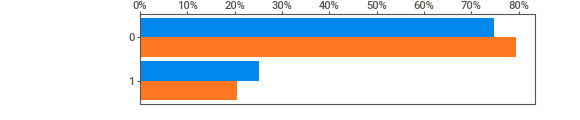
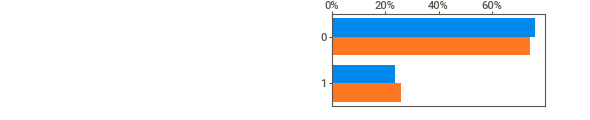
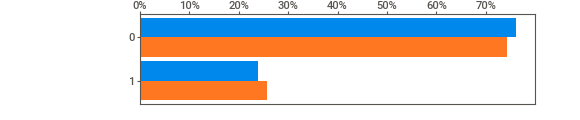
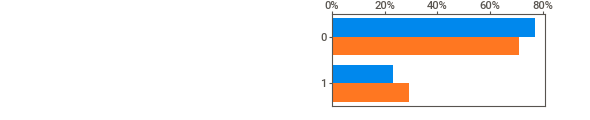
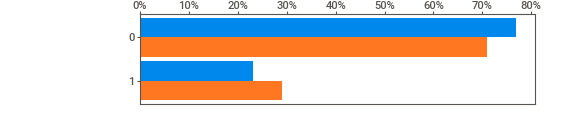
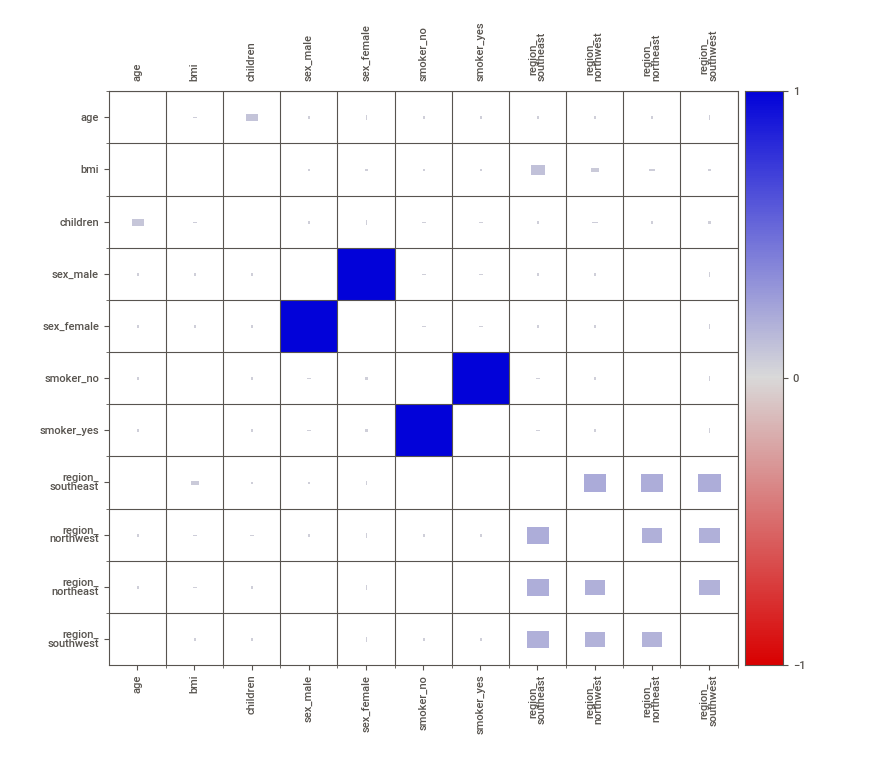
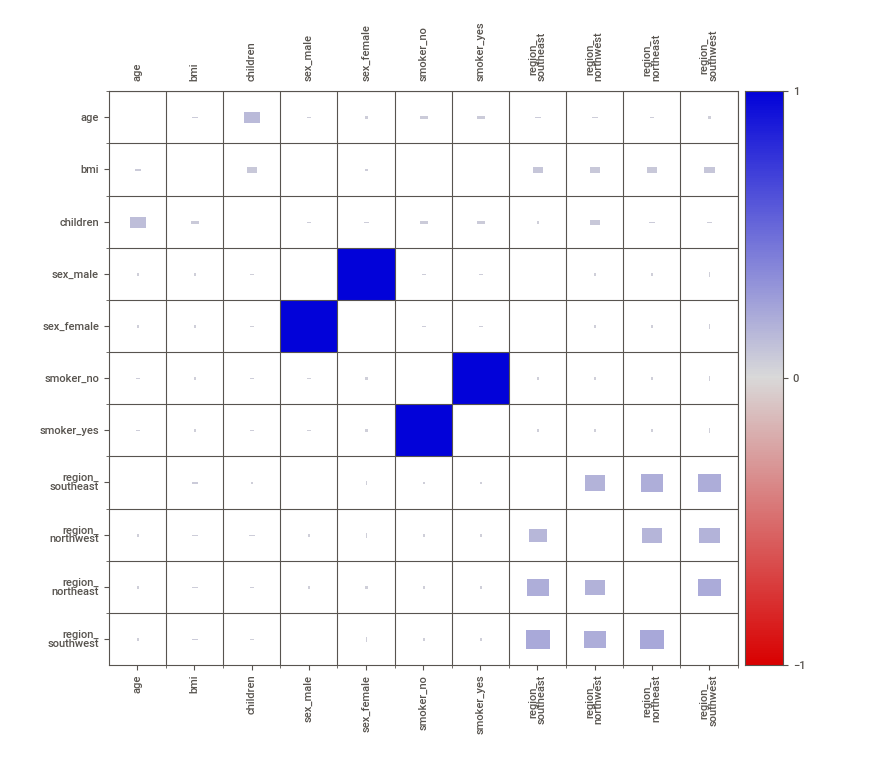

In [24]:

X_train.shape, X_test.shape

df1 = sv.compare(X_train, X_test)
# df1.show_html('Compare_train_test')
df1.show_notebook()
## verifico que haya una similar variabilidad entre train, test

In [25]:
train_dataset=X_train
train_labels=y_train
test_dataset=X_test
test_labels=y_test

In [26]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb


np.random.seed(10)


# d1 = np.random.randint(2, size=(100, 9))
# d2 = np.random.randint(3, size=(100, 9))
# d3 = np.random.randint(4, size=(100, 9))
# Y = np.random.randint(7, size=(100,))


# X = np.column_stack([d1, d2, d3])

rs_params = {

        'bagging_fraction': (0.5, 0.8,0.9),
        'bagging_frequency': (2,5, 8),

        'feature_fraction': (0.5, 0.8),
        'max_depth': (1,3,10, 20),
        'min_data_in_leaf': (30,90, 120),
        'num_leaves': (600,1200, 1550)

}

# Initialize a RandomizedSearchCV object using 5-fold CV-
# rs_cv = RandomizedSearchCV(estimator=lgb.LGBMClassifier(), param_distributions=rs_params, cv = 5, n_iter=100,verbose=1)
rs_cv = RandomizedSearchCV(estimator=lgb.LGBMRegressor(random_state=10), param_distributions=rs_params, cv = 5, n_iter=100,verbose=1)

rs_cv.fit(X_train, y_train,verbose=1)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=10), n_iter=100,
                   param_distributions={'bagging_fraction': (0.5, 0.8, 0.9),
                                        'bagging_frequency': (2, 5, 8),
                                        'feature_fraction': (0.5, 0.8),
                                        'max_depth': (1, 3, 10, 20),
                                        'min_data_in_leaf': (30, 90, 120),
                                        'num_leaves': (600, 1200, 1550)},
                   verbose=1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

def build_model():
  # model = keras.Sequential([
  #   layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
  #   layers.Dense(64, activation='relu'),
  #   layers.Dense(1)
  # ])

  # optimizer = tf.keras.optimizers.RMSprop(0.001)

  # model.compile(loss='mse',
  #               optimizer=optimizer,
  #               metrics=['mae', 'mse'])
  num_neuronas = X_train.shape[1] 
  model= keras.Sequential([
    layers.Dense(num_neuronas, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(num_neuronas, activation='relu'),
    layers.Dense(num_neuronas, activation='relu'),
    layers.Dense(num_neuronas, activation='relu'),
    layers.Dense(1)
  ])

#Añadir un número de neuronas similar al número de features en X_train - 7 en el ejemplo

  # model.add(Dense(num_neuronas,activation='relu'))
  # model.add(Dense(num_neuronas,activation='relu'))
  # model.add(Dense(num_neuronas,activation='relu'))
  # model.add(Dense(num_neuronas,activation='relu'))
  # model.add(Dense(1)) # Indicar tantas neuronas de salida como variables a predecir, en este caso solo 1 variable "buy_price"

  opt = Adam(lr=0.001)
  # model.compile(optimizer = opt , loss =tf.keras.losses.BinaryCrossentropy() , metrics = ['accuracy'])
  model.compile(optimizer = opt ,loss='mse', metrics=['mae', 'mse'])
  # model.compile(optimizer='adam',loss='mse')
  return model




In [28]:
model= build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 540
Trainable params: 540
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# history = model.fit(train_data_gen,epochs = 30 ,callbacks=[es] ,validation_data = val_data_gen )
history =model.fit(x=X_train,y=y_train,
          callbacks=[es],
          validation_data=(X_test,y_test), #si indicamos validation_data en cada epoch calcula sobre el conjunto de test el resultado de pérdidas
          batch_size=128,epochs=500)

Epoch 1/500
9/9 [==============================] - 2s 93ms/step - loss: 318868608.0000 - mae: 13189.0439 - mse: 318868608.0000 - val_loss: 337694176.0000 - val_mae: 13594.1260 - val_mse: 337694176.0000
Epoch 2/500
9/9 [==============================] - 0s 11ms/step - loss: 318861728.0000 - mae: 13188.8330 - mse: 318861728.0000 - val_loss: 337685344.0000 - val_mae: 13593.8623 - val_mse: 337685344.0000
Epoch 3/500
9/9 [==============================] - 0s 13ms/step - loss: 318851904.0000 - mae: 13188.5322 - mse: 318851904.0000 - val_loss: 337672576.0000 - val_mae: 13593.4795 - val_mse: 337672576.0000
Epoch 4/500
9/9 [==============================] - 0s 17ms/step - loss: 318837536.0000 - mae: 13188.0918 - mse: 318837536.0000 - val_loss: 337654176.0000 - val_mae: 13592.9102 - val_mse: 337654176.0000
Epoch 5/500
9/9 [==============================] - 0s 10ms/step - loss: 318816864.0000 - mae: 13187.4365 - mse: 318816864.0000 - val_loss: 337628032.0000 - val_mae: 13592.0840 - val_mse: 33762

In [ ]:
# def plot_history(history):
#   hist = pd.DataFrame(history.history)
#   hist['epoch'] = history.epoch

#   plt.figure()
#   plt.xlabel('Epoch')
#   plt.ylabel('Mean Abs Error [MPG]')
#   plt.plot(hist['epoch'], hist['mae'],
#            label='Train Error')
#   plt.plot(hist['epoch'], hist['val_mae'],
#            label = 'Val Error')
#   plt.ylim([0,5])
#   plt.legend()

#   plt.figure()
#   plt.xlabel('Epoch')
#   plt.ylabel('Mean Square Error [$MPG^2$]')
#   plt.plot(hist['epoch'], hist['mse'],
#            label='Train Error')
#   plt.plot(hist['epoch'], hist['val_mse'],
#            label = 'Val Error')
#   plt.ylim([0,20])
#   plt.legend()
#   plt.show()


# plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)



9/9 - 0s - loss: 16453483.0000 - mae: 2527.0652 - mse: 16453483.0000 - 46ms/epoch - 5ms/step
Testing set Mean Abs Error: 2527.07 expenses
You passed the challenge. Great job!


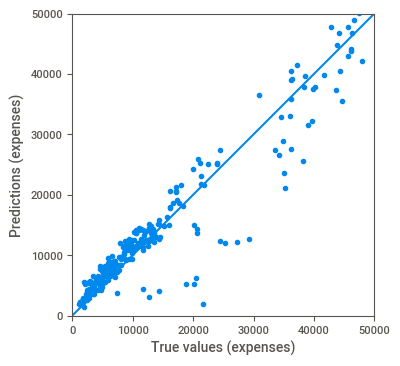

In [30]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
